In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from aldiscore.prediction import utils
from aldiscore import ROOT

In [31]:
data_dir = Path("/hits/fast/cme/bodynems/data/paper")
feat_df, *_ = utils.load_features(
    data_dir,
    include_features=["is_dna", "num_seqs", "seq_length"],
)
# feat_df.columns = clean_feat_names

feat_df = feat_df[["is_dna", "num_seqs", "max.seq_length"]]
feat_df.head()

Dropping 0 NaN rows...


is_dna  num_seqs  max.seq_length
source    dataset                                  
arthropod CYP_12    False       141             558
          CYP_15    False       148             524
          CYP_18    False       124             569
          CYP_2     False        16             544
          CYP_20    False        19             494

In [2]:
perf_dir = ROOT / "logs" / "perf"
perf_file = sorted(os.listdir(perf_dir))[-1]
print(perf_file)
perf_df = pd.read_parquet(perf_dir / perf_file)
# perf_df = pd.concat([perf_df, feat_df], axis=1)
perf_df

2025-10-02_15-01-52.parquet


_init_basics  _init_char_dists  _init_psa  \
source      dataset                                                   
treebase_v1 14688_27.phy      0.086037          0.000551   0.013029   
            21420_1.phy       0.094667          0.000540   0.015979   
            21918_2.phy       0.102061          0.000863   0.107199   
            14688_14.phy      0.098858          0.000938   0.076400   
            17890_0.phy       0.096263          0.001230   0.242161   
...                                ...               ...        ...   
            15669_1.phy       0.008436          0.005818   0.843444   
            12871_0.phy       0.010019          0.014073  70.184689   
            10088_0.phy       0.005067          0.003085   4.907056   
            11480_0.phy       0.008649          0.006829   6.707516   
            10011_0.phy       0.015456          0.014701  31.896035   

                          _init_psa_index_map  _data_type  _num_sequences  \
source      dataset                                                         
treebase_v1 14688_27.phy             0.000806    0.000016        0.000015   
            21420_1.phy              0.002040    0.000020        0.000018   
            21918_2.phy              0.002063    0.000018        0.000016   
            14688_14.phy             0.006978    0.000021        0.000018   
            17890_0.phy              0.006871    0.000021        0.000018   
...                                       ...         ...             ...   
            15669_1.phy              0.055452    0.000007        0.000004   
            12871_0.phy              0.074287    0.000006        0.000011   
            10088_0.phy              0.045178    0.000006        0.000003   
            11480_0.phy              0.061235    0.000005        0.000004   
            10011_0.phy              0.077819    0.000017        0.000014   

                          _sequence_length  _sequence_length_ratio  \
source      dataset                                                  
treebase_v1 14688_27.phy          0.002715                0.000025   
            21420_1.phy           0.004287                0.000024   
            21918_2.phy           0.001180                0.000022   
            14688_14.phy          0.001119                0.000027   
            17890_0.phy           0.001173                0.000029   
...                                    ...                     ...   
            15669_1.phy           0.000616                0.000062   
            12871_0.phy           0.000715                0.000050   
            10088_0.phy           0.000570                0.000055   
            11480_0.phy           0.000585                0.000047   
            10011_0.phy           0.001121                0.000055   

                          _lower_bound_gap_percentage  _sequence_entropy  \
source      dataset                                                        
treebase_v1 14688_27.phy                     0.000056           0.000530   
            21420_1.phy                      0.000056           0.000595   
            21918_2.phy                      0.000049           0.000505   
            14688_14.phy                     0.000048           0.000522   
            17890_0.phy                      0.000050           0.000494   
...                                               ...                ...   
            15669_1.phy                      0.000069           0.000483   
            12871_0.phy                      0.000045           0.000397   
            10088_0.phy                      0.000094           0.000619   
            11480_0.phy                      0.000051           0.000586   
            10011_0.phy                      0.000067           0.000529   

                          _char_js_divergence  _homopolymer_js_divergence  \
source      dataset                                                         
treebase_v1 14688_27.phy             0.000573 

In [33]:
# Median execution time for all sources
perf_df.sum(axis=1).groupby("source").median().sort_values(ascending=False).to_frame().T

source,treebase_v1,prefab4,bali3,bralibase_k15,arthropod,ox,bali2dnaf,bali2dna,formatt_sabmark,bralibase_k7,sabre,formatt_homstrad,bralibase_k5
0,20.245638,1.910574,0.534537,0.496872,0.443918,0.385321,0.318234,0.247891,0.221296,0.217808,0.157688,0.152065,0.063115


In [40]:
import seaborn as sn
import matplotlib.pyplot as plt

heavy_cols = ["_init_psa"]
plot_df = perf_df[heavy_cols].copy()
plot_df.columns = ["PSA computation"]

drop_cols = heavy_cols + ["_ent_randomness"]
plot_df["rest"] = perf_df.drop(drop_cols, errors="ignore", axis=1).sum(axis=1)

input_sizes = (feat_df["num_seqs"] * feat_df["max.seq_length"]).loc[plot_df.index]
# input_sizes = (feat_df["num_seqs"]).loc[plot_df.index]
plot_df["input_size"] = input_sizes

In [ ]:
total = pd.cut(plot_df.sum(axis=1), bins=np.linspace(0, 250000, 20))

source         dataset                      
bralibase_k5   HIV_FE.apsi-86.sci-94.no-5       (0.0, 13157.895]
               IRES_HCV.apsi-88.sci-70.no-1     (0.0, 13157.895]
               HIV_FE.apsi-92.sci-94.no-1       (0.0, 13157.895]
               HIV_GSL3.apsi-88.sci-77.no-2     (0.0, 13157.895]
               tRNA.apsi-39.sci-142.no-1        (0.0, 13157.895]
                                                      ...       
bralibase_k15  tRNA.apsi-48.sci-130.no-1        (0.0, 13157.895]
               5S_rRNA.apsi-57.sci-73.no-1      (0.0, 13157.895]
               SRP_bact.apsi-50.sci-92.no-1     (0.0, 13157.895]
               tRNA.apsi-46.sci-136.no-1        (0.0, 13157.895]
               SRP_bact.apsi-54.sci-103.no-1    (0.0, 13157.895]
Length: 11431, dtype: category
Categories (19, interval[float64, right]): [(0.0, 13157.895] < (13157.895, 26315.789] < (26315.789, 39473.684] < (39473.684, 52631.579] ... (197368.421, 210526.316] < (210526.316, 223684.211] < (223684.211, 23

In [35]:
plot_df = plot_df.melt(
    id_vars=["input_size"],
    value_vars=["PSA computation", "rest"],
    var_name="aspect",
    value_name="time (s)",
)
plot_df

,input_size,aspect,time (s)
0,260,PSA computation,0.046730
1,1600,PSA computation,0.049843
2,260,PSA computation,0.057079
3,420,PSA computation,0.001466
4,370,PSA computation,0.000875
...,...,...,...
22857,1335,rest,0.074237
22858,1815,rest,0.079572
22859,1560,rest,0.083561
22860,1305,rest,0.091035


<Axes: xlabel='input_size', ylabel='time (s)'>

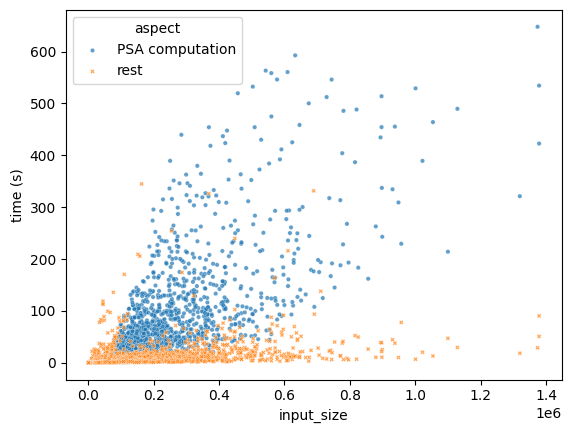

In [36]:
sn.scatterplot(
    data=plot_df,
    x="input_size",
    y="time (s)",
    hue="aspect",
    style="aspect",
    alpha=0.7,
    s=10,
)

/tmp/ipykernel_1226919/3766807520.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels(xticklabels, rotation=45)


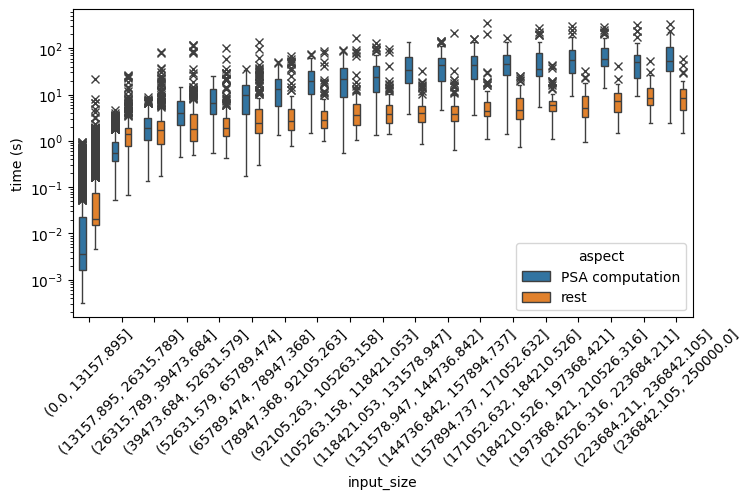

In [37]:
x = pd.cut(plot_df["input_size"], bins=np.linspace(0, 250000, 20))
fig = plt.figure(figsize=(8, 4))
sn.boxplot(
    data=plot_df,
    x=x,
    y="time (s)",
    hue="aspect",
    gap=0.5,
    flierprops={"marker": "x"},
)
plt.yscale("log")
xticklabels = plt.gca().get_xticklabels()
_ = plt.gca().set_xticklabels(xticklabels, rotation=45)